In [89]:
import pandas as pd
from sqlalchemy import create_engine
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from matplotlib.pyplot import figure

In [90]:
# !ls

In [91]:
import pymysql
pymysql.install_as_MySQLdb()

Context

Over 67k employee reviews for Google, Amazon, Facebook, Apple, and Microsoft
Content

This dataset contains employee reviews separated into the following categories:

    Index: index
    Company: Company name
    Location : This dataset is global, as such it may include the country's name in parenthesis [i.e "Toronto, ON(Canada)"]. However, if the location is in the USA then it will only include the city and state[i.e "Los Angeles, CA" ]
    Date Posted: in the following format MM DD, YYYY
    Job-Title: This string will also include whether the reviewer is a 'Current' or 'Former' Employee at the time of the review
    Summary: Short summary of employee review
    Pros: Pros
    Cons: Cons
    Overall Rating: 1-5
    Work/Life Balance Rating: 1-5
    Culture and Values Rating: 1-5
    Career Opportunities Rating: 1-5
    Comp & Benefits Rating: 1-5
    Senior Management Rating: 1-5
    Helpful Review Count: A count of how many people found the review to be helpful
    Link to Review : This will provide you with a direct link to the page that contains the review. However it is likely that this link will be outdated

NOTE: 'none' is placed in all cells where no data value was found.
Acknowledgements

This data was scraped from Glassdoor
Inspiration

To inspire people to create ML models to search for meaningful trends within this dataset 

### Store CSV into DataFrame

In [92]:
# The csv files for the employee reviews of companies including Google
reviews_file = "Resources/employee_reviews.csv"
customer_data_df = pd.read_csv(reviews_file)
customer_data_df.head()

,Unnamed: 0,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
0,1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
1,2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...
2,3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...
3,4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,5.0,5.0,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...
4,5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,5.0,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...


### Create new data with select columns

In [93]:
# Selecting only from Google employees
google_review_df=customer_data_df[customer_data_df["company"]=="google"]
print(google_review_df.shape)

# Create new data with selected columns
google_df=google_review_df[["dates","job-title", "overall-ratings"]].copy()

# Selecting only the current employees and the anonymous reviews to be objective
google_df=google_df[google_df["job-title"].str.contains("Current")]
google_df=google_df[google_df["job-title"].str.contains("Anonymous")]
print(google_df.shape)
google_df.head()

(7819, 17)
(2251, 3)


,dates,job-title,overall-ratings
0,"Dec 11, 2018",Current Employee - Anonymous Employee,5.0
3,"Feb 8, 2015",Current Employee - Anonymous Employee,5.0
8,"Dec 10, 2018",Current Employee - Anonymous Employee,5.0
9,"Dec 9, 2018",Current Employee - Anonymous Employee,5.0
10,"Dec 8, 2018",Current Employee - Anonymous Employee,5.0


In [94]:
# Convert the date format to a standard date
google_df["date"]=google_df.dates.apply(lambda x: pd.to_datetime(x).strftime('%Y-%m-01'))
google_df=google_df[["date","job-title", "overall-ratings"]].copy()
google_df.head()

,date,job-title,overall-ratings
0,2018-12-01,Current Employee - Anonymous Employee,5.0
3,2015-02-01,Current Employee - Anonymous Employee,5.0
8,2018-12-01,Current Employee - Anonymous Employee,5.0
9,2018-12-01,Current Employee - Anonymous Employee,5.0
10,2018-12-01,Current Employee - Anonymous Employee,5.0


In [95]:
google_month_df=google_df.groupby("date").mean()
google_month_df['date'] = google_month_df.index
google_month_df.index.names = ['dates']
#google_month_df.reset_index()
google_month_df.head()

,overall-ratings,date
dates,,
2008-06-01,3.25,2008-06-01
2008-07-01,5.00,2008-07-01
2008-09-01,2.00,2008-09-01
2008-10-01,4.00,2008-10-01
2009-04-01,4.00,2009-04-01


### Store CSV data into a DataFrame

In [96]:
stock_value_file = "Resources/HistoricalQuotes.csv"
stock_df = pd.read_csv(stock_value_file)
stock_df["dates"]=stock_df.date.apply(lambda x: pd.to_datetime(x).strftime('%Y-%m-01'))
# Select the necessary colums only, we take closing value as reference.
stock_df=stock_df[["dates", "close"]]
stock_df.head()

,dates,close
0,2019-04-01,1222.73
1,2019-04-01,1209.59
2,2019-04-01,1206.45
3,2019-04-01,1202.69
4,2019-04-01,1208.28


In [97]:
stock_month_df=stock_df.groupby("dates").mean()
stock_month_df['date'] = stock_month_df.index
stock_month_df.head()

,close,date
dates,,
2009-04-01,194.243000,2009-04-01
2009-05-01,202.071835,2009-05-01
2009-06-01,214.072609,2009-06-01
2009-07-01,215.844095,2009-07-01
2009-08-01,231.315957,2009-08-01


### Clean DataFrame

In [106]:
data_df=pd.merge(google_month_df, stock_month_df, how='left', on="date",
         left_index=False, right_index=False, sort=True,
         suffixes=('_rev', '_stock'), copy=True, indicator=False,
         validate=None)
data_df.dropna(thresh=1)
datas_df = data_df[data_df['close'].notnull()]
datas_df.columns=["overall_ratings","date", "close"]
print(datas_df.shape)
datas_df.head()

(115, 3)


,overall_ratings,date,close
4,4.000000,2009-04-01,194.243000
5,5.000000,2009-05-01,202.071835
6,4.000000,2009-06-01,214.072609
7,2.333333,2009-07-01,215.844095
8,5.000000,2009-08-01,231.315957


In [107]:
datas_df.dtypes

overall_ratings    float64
date                object
close              float64
dtype: object

## Go, run the google_review.sql file to create the database and the tables

### Connect to local database

In [108]:
rds_connection_string = "root:sifre@localhost/google_db"
engine = create_engine(f'mysql://{rds_connection_string}')

### Check for tables

In [109]:
engine.table_names()

['google_review']

### Use pandas to load csv converted DataFrame into database

In [110]:
datas_df.to_sql(name='google_review', con=engine, if_exists='append', index=False)

### Confirm data has been added by querying the customer_name table
* NOTE: can also check using pgAdmin

In [112]:
data_df=pd.read_sql_query('select * from google_review', con=engine)
data_df.head()

,id,overall_ratings,date,close
0,1,4.00000,2009-04-01,194.243
1,2,5.00000,2009-05-01,202.072
2,3,4.00000,2009-06-01,214.073
3,4,2.33333,2009-07-01,215.844
4,5,5.00000,2009-08-01,231.316


In [115]:
data_df["overall_ratings"].describe()

count    115.000000
mean       4.289137
std        0.438785
min        2.333330
25%        4.179490
50%        4.400000
75%        4.544155
max        5.000000
Name: overall_ratings, dtype: float64

In [116]:
data_df["close"].describe()

count     115.000000
mean      571.387322
std       292.555871
min       194.243000
25%       303.416000
50%       542.980000
75%       777.888000
max      1240.650000
Name: close, dtype: float64

In [117]:
# Set data
x_axis = data_df["overall-ratings"]
y_axis =data_df["close"]

KeyError: 'overall-ratings'

In [118]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
print(slope)
print(r_value)

271.09444642112555
0.406595858424605


<Figure size 1440x1280 with 0 Axes>

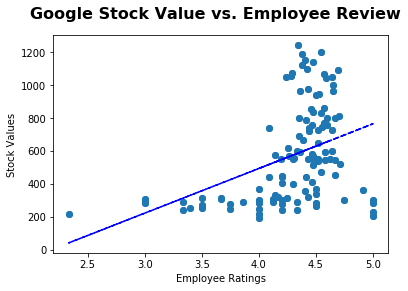

<Figure size 1440x1280 with 0 Axes>

In [119]:
# Plot data
fig, ax = plt.subplots()

fig.suptitle("Google Stock Value vs. Employee Review", fontsize=16, fontweight="bold")

# ax.set_xlim(0, 10)
# ax.set_ylim(0, 10)

ax.set_xlabel("Employee Ratings")
ax.set_ylabel("Stock Values")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')
figure(num=None, figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')
# plt.show()